# 空間濾波

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

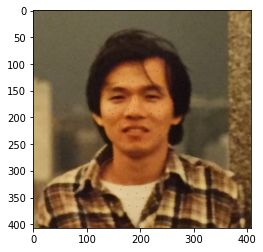

In [3]:
src = cv2.imread("hung.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src);

## 均值濾波器

In [14]:
dst_mean = cv2.blur(src,(15,15))

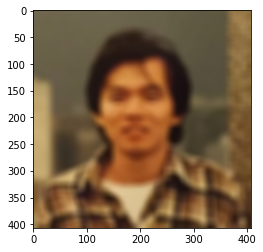

In [17]:
plt.imshow(dst_mean);

## 中值濾波

* 適合用在椒鹽雜訊的處理

In [15]:
# 中值濾波
dst_median = cv2.medianBlur(
    src, 
    15 # kernel size
)

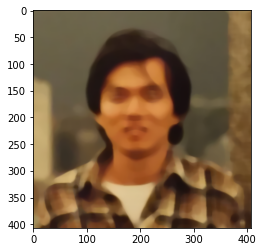

In [19]:
plt.imshow(dst_median);

## 高斯濾波器

In [16]:
dst_gaussian = cv2.GaussianBlur(
    src,
    (15,15), # kernel size
    0.85, # sigma x
    0.85 # sigma y
)

* 如果開 3x3 kernel size，那正中心的 (x,y) = (0,0)，左邊是 (-1,0), 右邊是 (1,0)，左上 (-1,1), 右上 (1,1), ...
* 然後 gausian kernel 就是中心放在 (0,0) 的二元獨立常態分配: $f(x,y)=\frac{1}{2\pi\sigma_x\sigma_y}e^{-\frac{1}{2}(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2})}$
* 所以就直接想像一個二元常態像碗一樣，蓋在 kernel 的正中心，然後他的 density 大小，就是周邊加權平均時用的權重

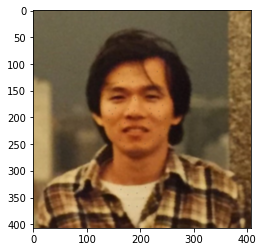

In [18]:
plt.imshow(dst_gaussian);

## 雙邊濾波器

In [13]:
dst_bilateral = cv2.bilateralFilter(
    src,
    15, # d，以像素為中心的濾波直徑，建議值 5。如果此值是負數，會自動參照下面的 sigmaSpace
    100, # sigmaColor，像素顏色值與周圍像素顏色值的差距，在此範圍，才做濾波。如果超過此範圍，他會覺得這是邊緣，就不做濾波
    100 # sigmaSpace，距離的空間參數，如果 d >0，此值可忽略。
)      

* 雙邊濾波會考慮邊緣訊息

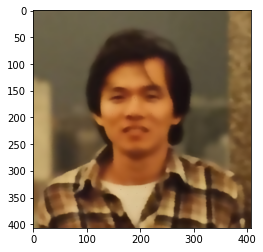

In [11]:
plt.imshow(dst_bilateral);

## 自訂 2d 濾波器

In [22]:
kernel = np.ones((5,5), np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

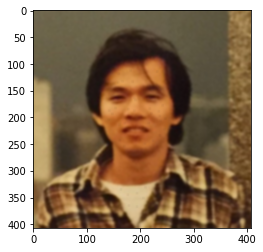

In [24]:
dst = cv2.filter2D(
    src,
    -1, # ddpeth, 目前影像的深度，設 -1，表示與來源影像相同
    kernel # 自訂的 kernel
)

plt.imshow(dst);